#Description du projet!
  ## Description du Dataset
C'est un ensemble de données réelles qui mesure la progression de la diabète chez des patients diabétiques un an après les données de base.
  ### caractéristiques
* Les Features:  10 variables indépendantes quantitatives normales:

    * Age : Âge du patient.
    * Sexe : Sexe du patient.
    * BMI : Indice de Masse Corporelle.
    * BP : Pression sanguine moyenne.
    * S1-S6 : Six mesures sanguines (niveaux de lipides, glucose, etc.).

* Cible (Target) : La variable cible est une mesure quantitative continue de la progression de la maladie un an après la collecte des variables de base pour chaque patient.
  Une valeur plus élevée peut suggérer une progression plus rapide ou plus sévère, tandis qu'une valeur plus faible pourrait indiquer une progression plus lente ou un état de santé meilleur.

## Objectif du programme
Prédire la progression du diabète

#Importation des librairies


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import sklearn.decomposition as PCA

## Téléchargement du dataset

In [4]:
# Load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('diabete.csv')


Saving diabete.csv to diabete.csv


# Connaissance du dataset et analyse des dimensions de la base

In [5]:
# affichage de l'entête du dataset
df.head()

,Unnamed: 0,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [22]:
#df = df.drop('Unnamed: 0', axis=1)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
# affichage des infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## Analyse des valeurs nulles

In [10]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


## Analyse des valeurs abérantes
  Valeurs aberrantes pour les variables
    * BMI
    * S1
    * S2
    * S3
    * S4
    * S6

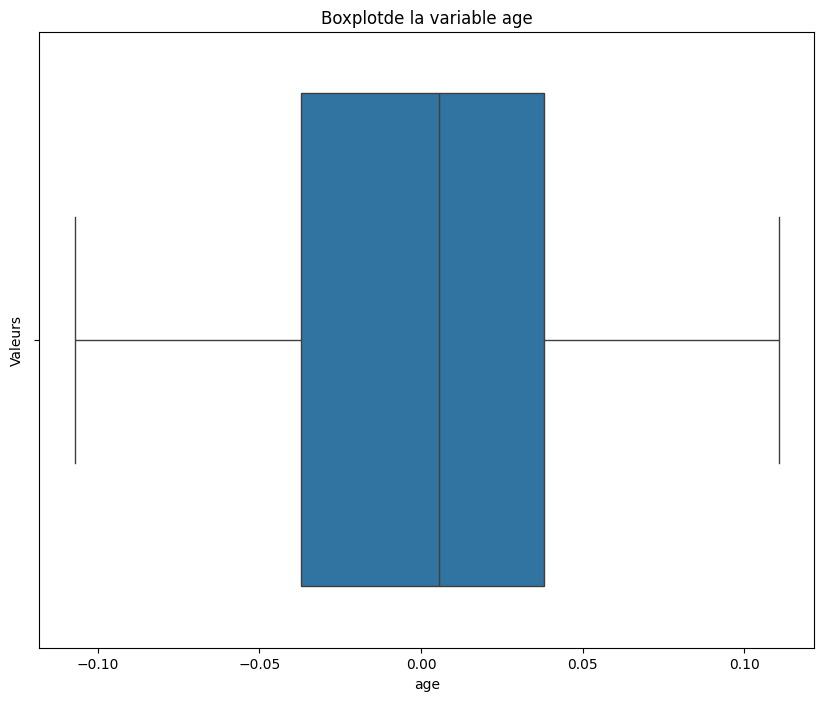

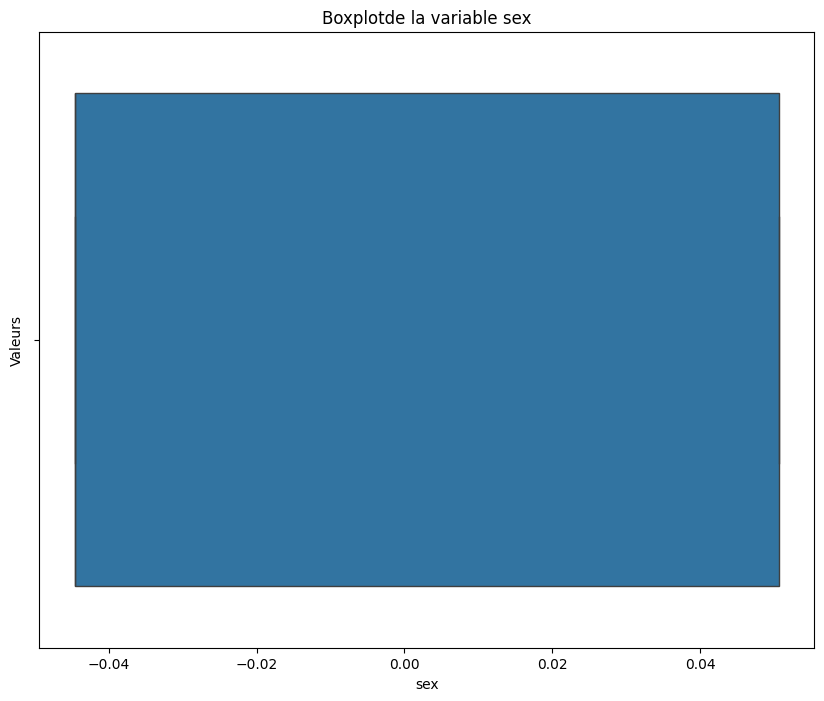

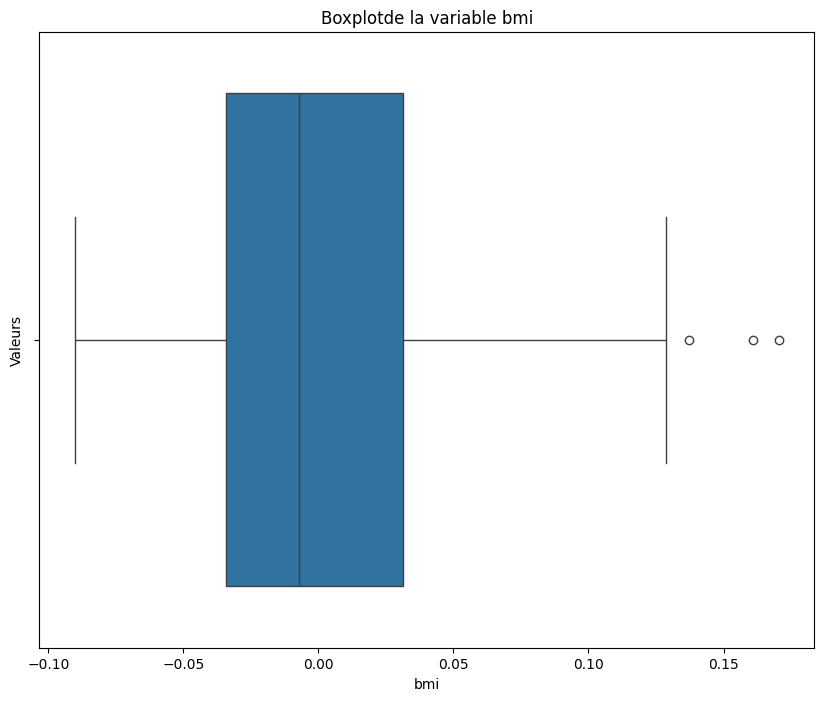

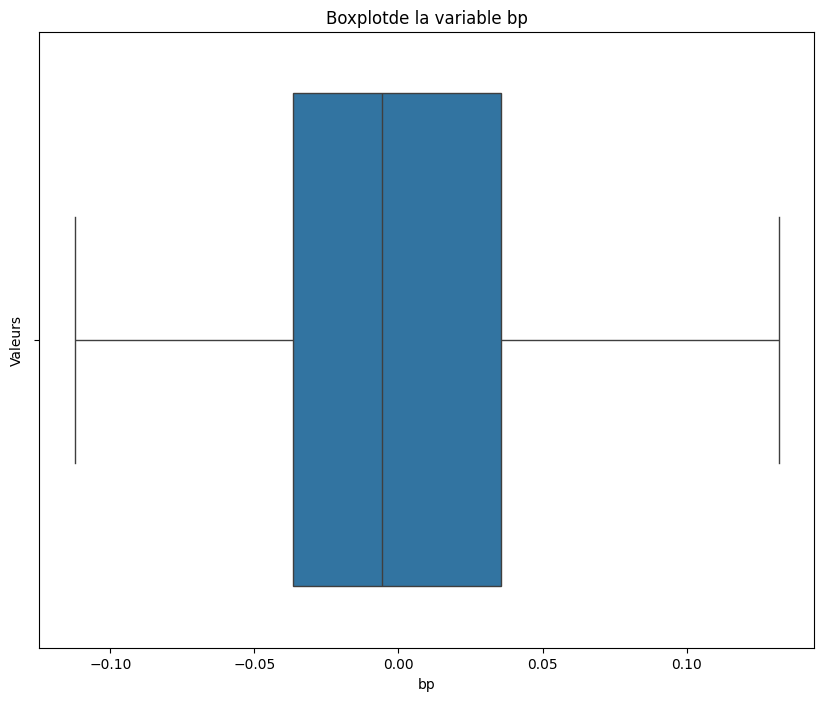

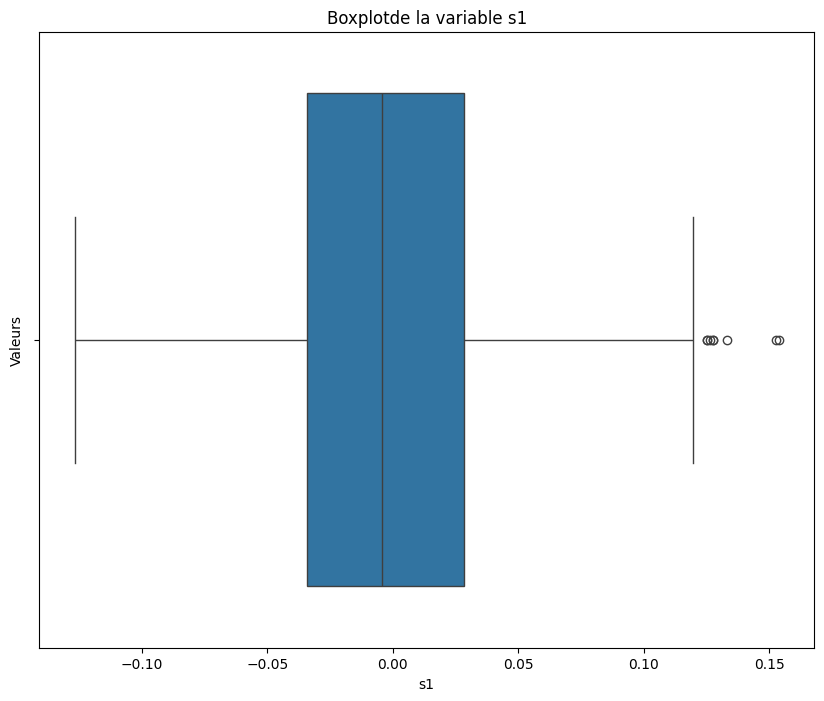

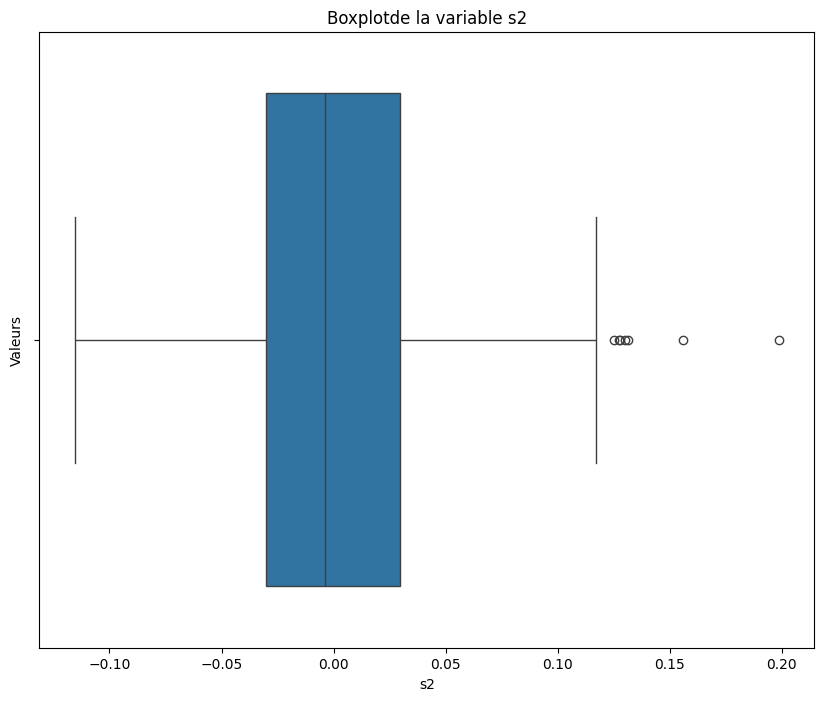

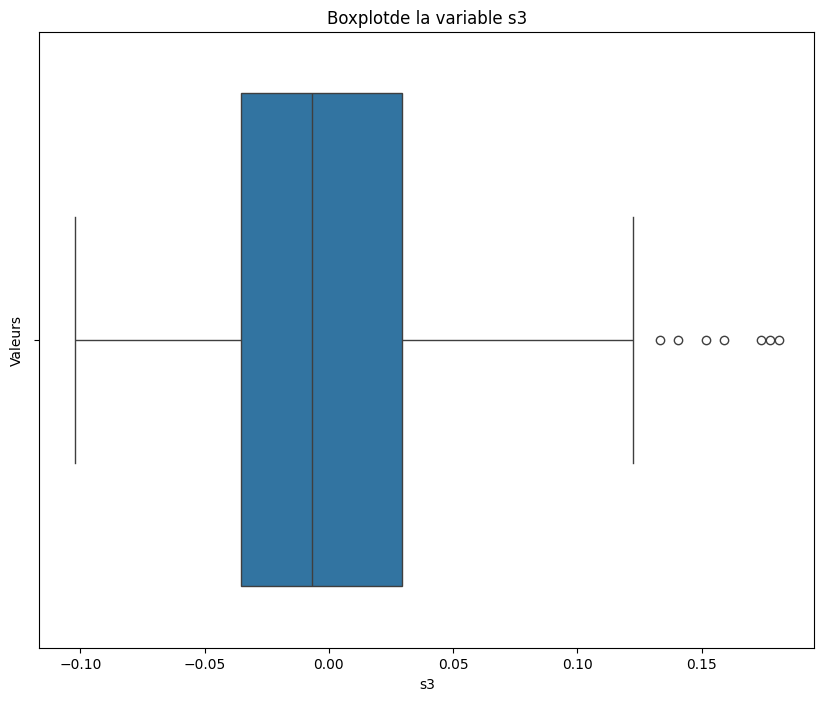

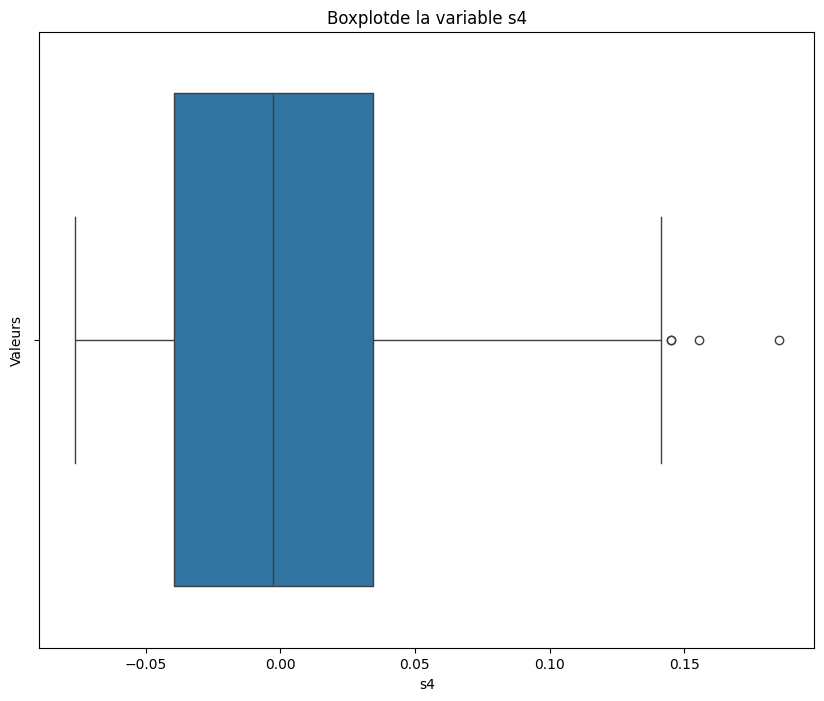

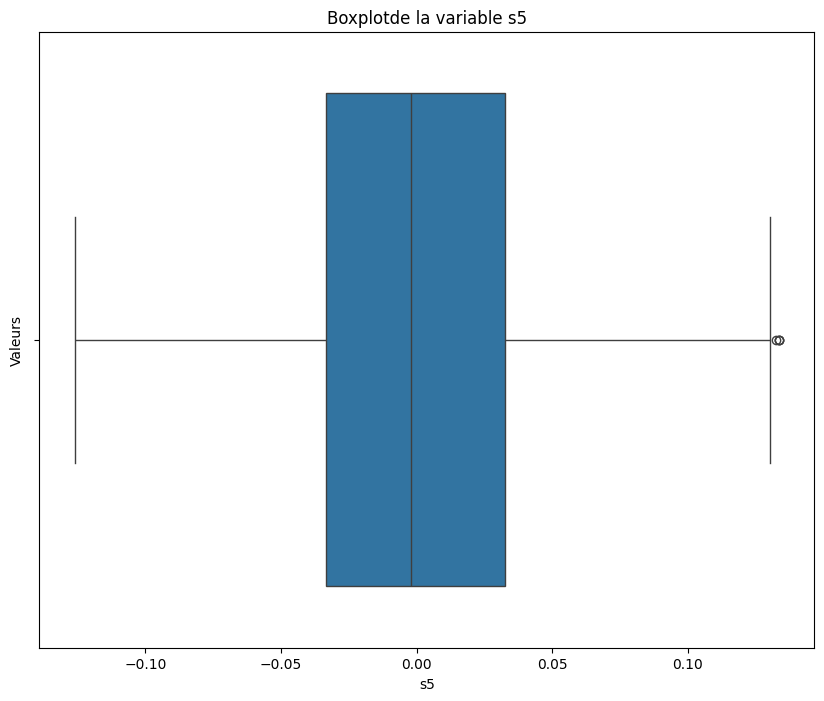

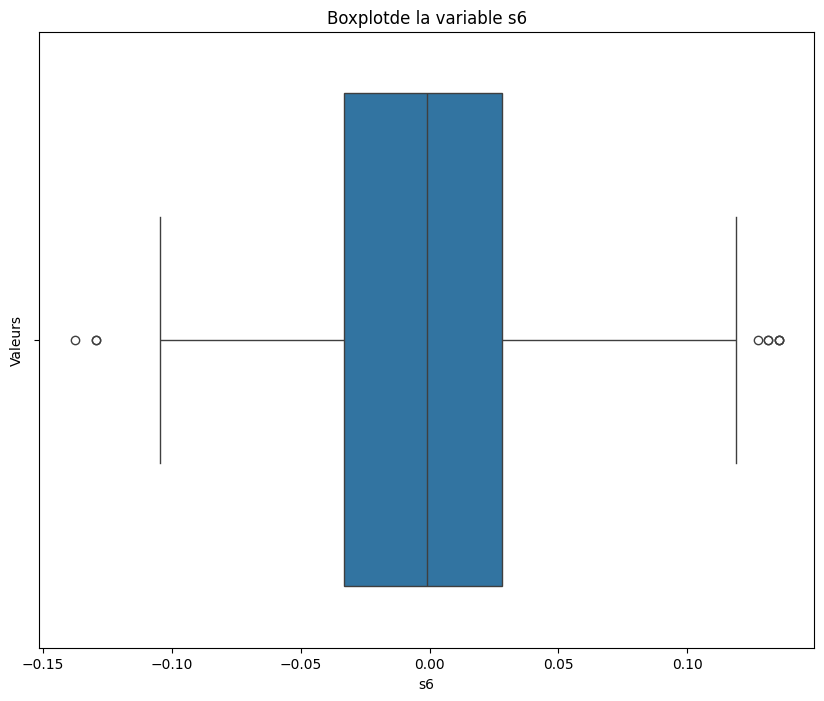

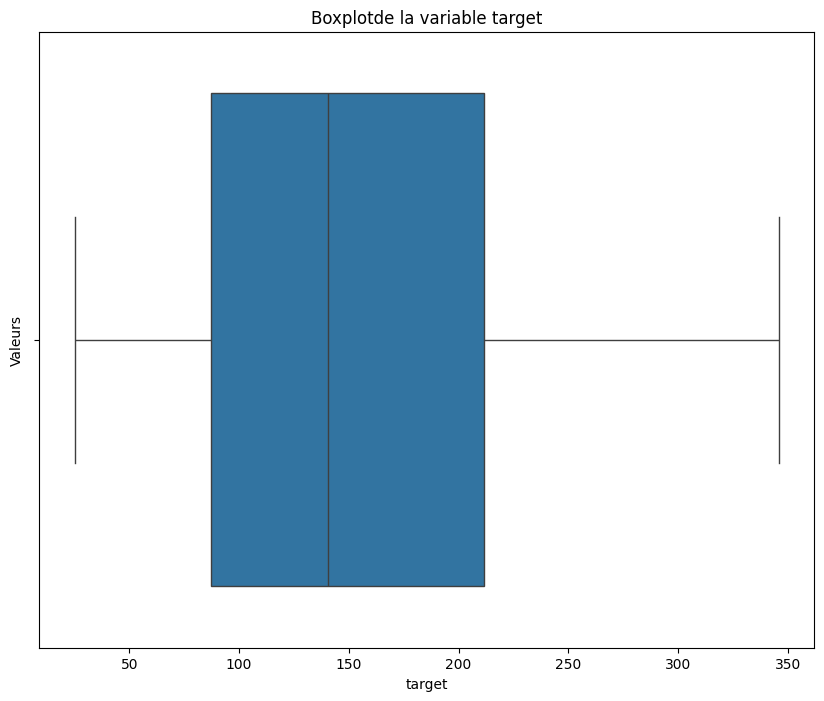

In [32]:

 for column in df.columns:
  plt.figure(figsize=(10, 8))
  sns.boxplot(data =df, x=column)
  plt.title(f'Boxplotde la variable {column}')
  plt.xlabel(column)
  plt.ylabel('Valeurs')
  plt.show()

## Analyse statistique univariée

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,442.0,-7.284269e-18,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,2.348549e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.087320e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.571507e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-9.293722e-18,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,4.420798e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,2.135044e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,2.913707e-17,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.143013e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.431736e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


## Analyse de la distribution des variables

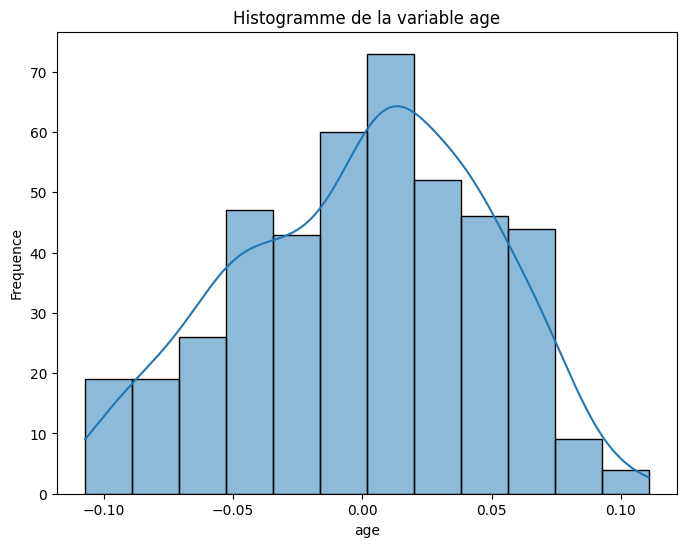

La variable age n'est pas normalement distribuée (p-value=1.0228182153993652e-05)


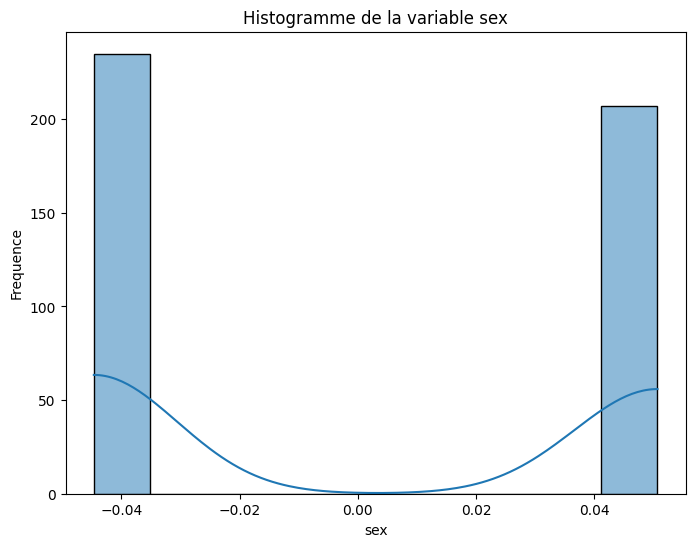

La variable sex n'est pas normalement distribuée (p-value=0.0)


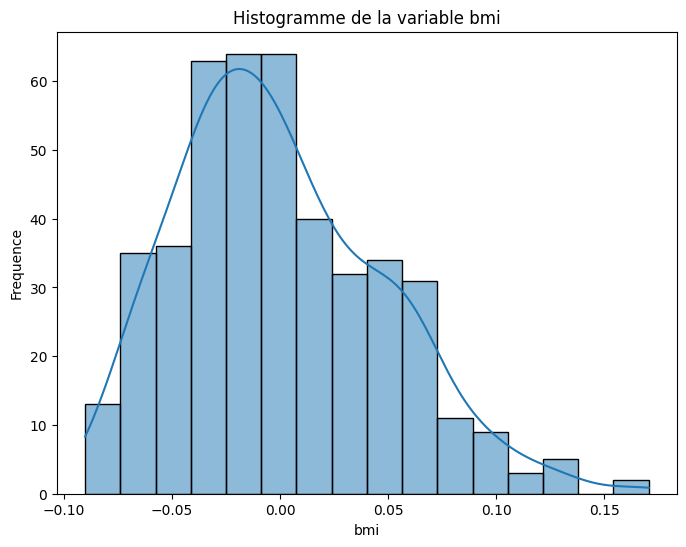

La variable bmi n'est pas normalement distribuée (p-value=7.262331793832733e-06)


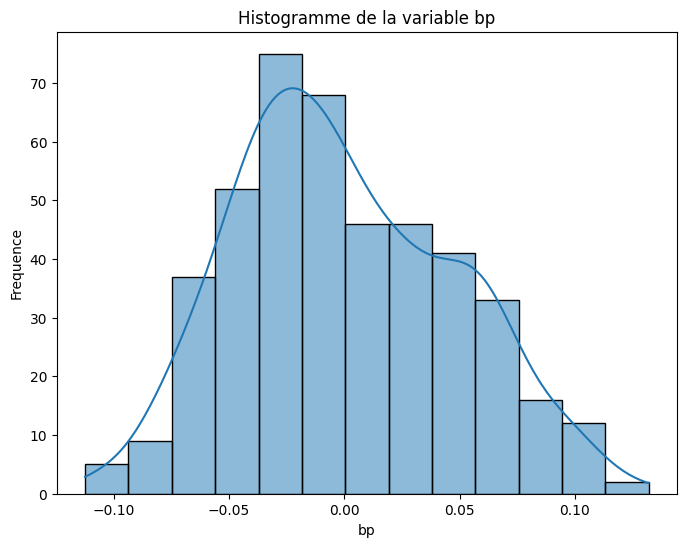

La variable bp n'est pas normalement distribuée (p-value=0.0004053759583625542)


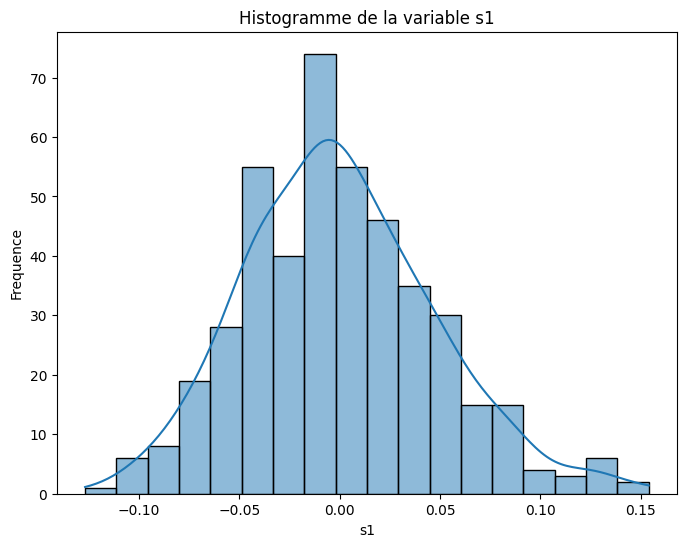

La variable s1 n'est pas normalement distribuée (p-value=0.003682130413975428)


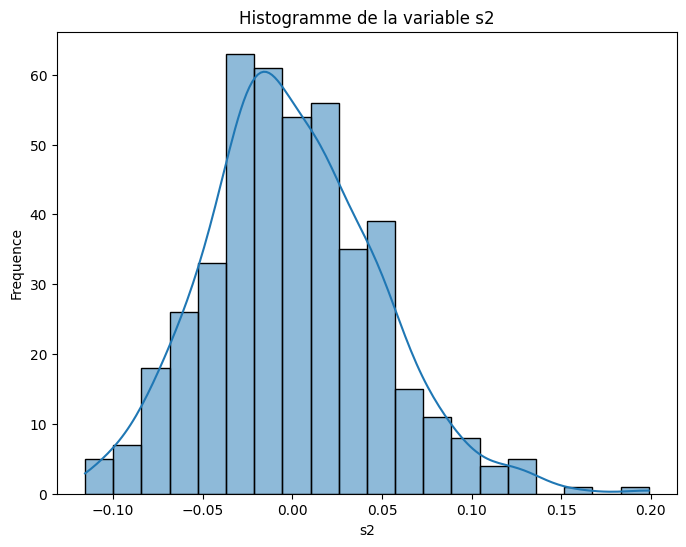

La variable s2 n'est pas normalement distribuée (p-value=0.00012149451358986973)


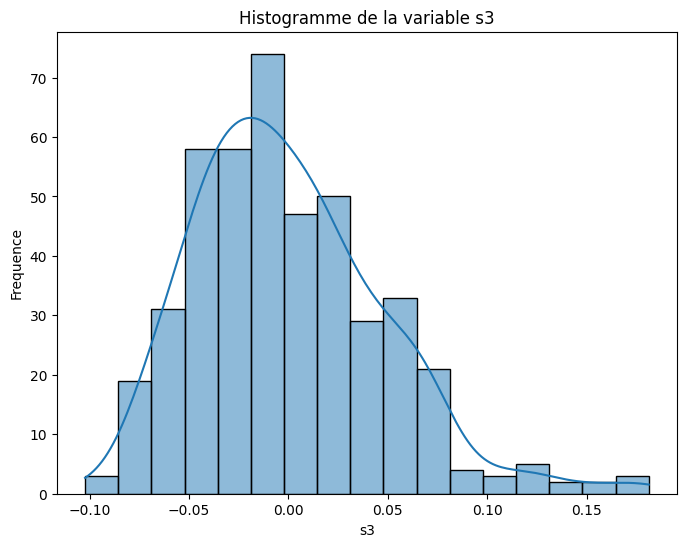

La variable s3 n'est pas normalement distribuée (p-value=4.0072679573115066e-11)


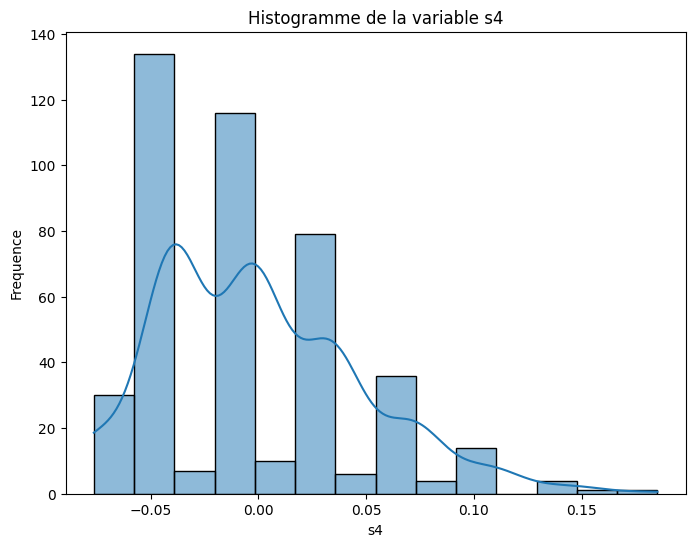

La variable s4 n'est pas normalement distribuée (p-value=1.3014776207788361e-08)


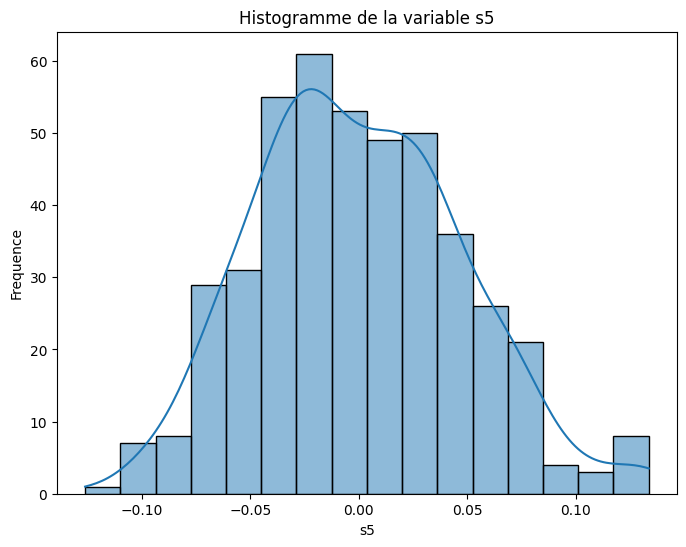

La variable s5 n'est pas normalement distribuée (p-value=0.039503377366703514)


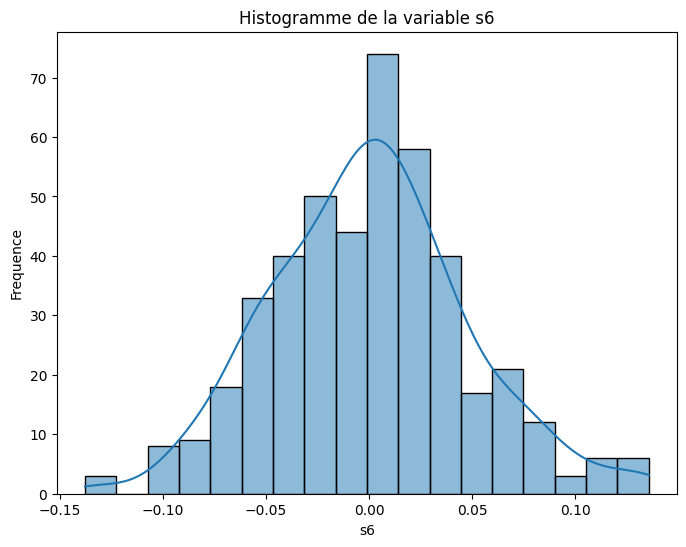

La variable s6 est normalement distribuée (p-value=0.1167347712297642)


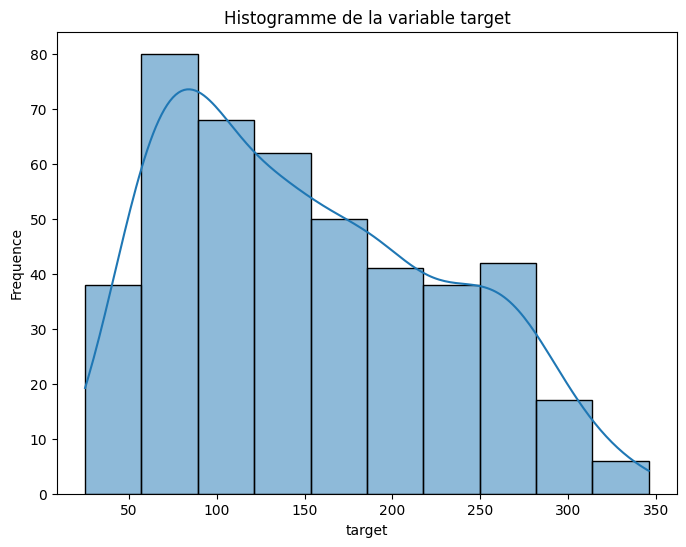

La variable target n'est pas normalement distribuée (p-value=1.1743678801847827e-14)


In [16]:
 # Création d'un histogramme et un test de normalité pour chaque variable
 for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(data =df, x=column, kde=True)
  plt.title(f'Histogramme de la variable {column}')
  plt.xlabel(column)
  plt.ylabel('Frequence')
  plt.show()

  # test de normalité
  statistic, p_value = stats.normaltest(df[column])
  if p_value > 0.05:
    print(f'La variable {column} est normalement distribuée (p-value={p_value})')
  else:
    print(f'La variable {column} n\'est pas normalement distribuée (p-value={p_value})')

## Analyse de la target
  La target n'est pas normalement distribuée, ce qui aura un impact sur le model de prédiction

  Faut il appliquer une transformation pour normaliser rendre la distribution normale afin d'améliorer les performance des modèles?

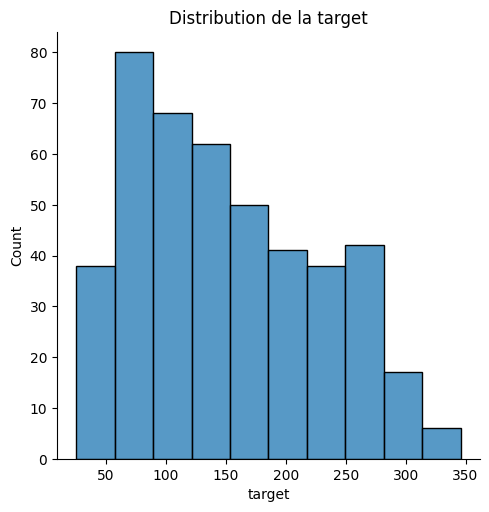

In [26]:
sns.displot(df['target'])
plt.title('Distribution de la target')
plt.show()

## Visualisation des Relations entre les Features et la Target

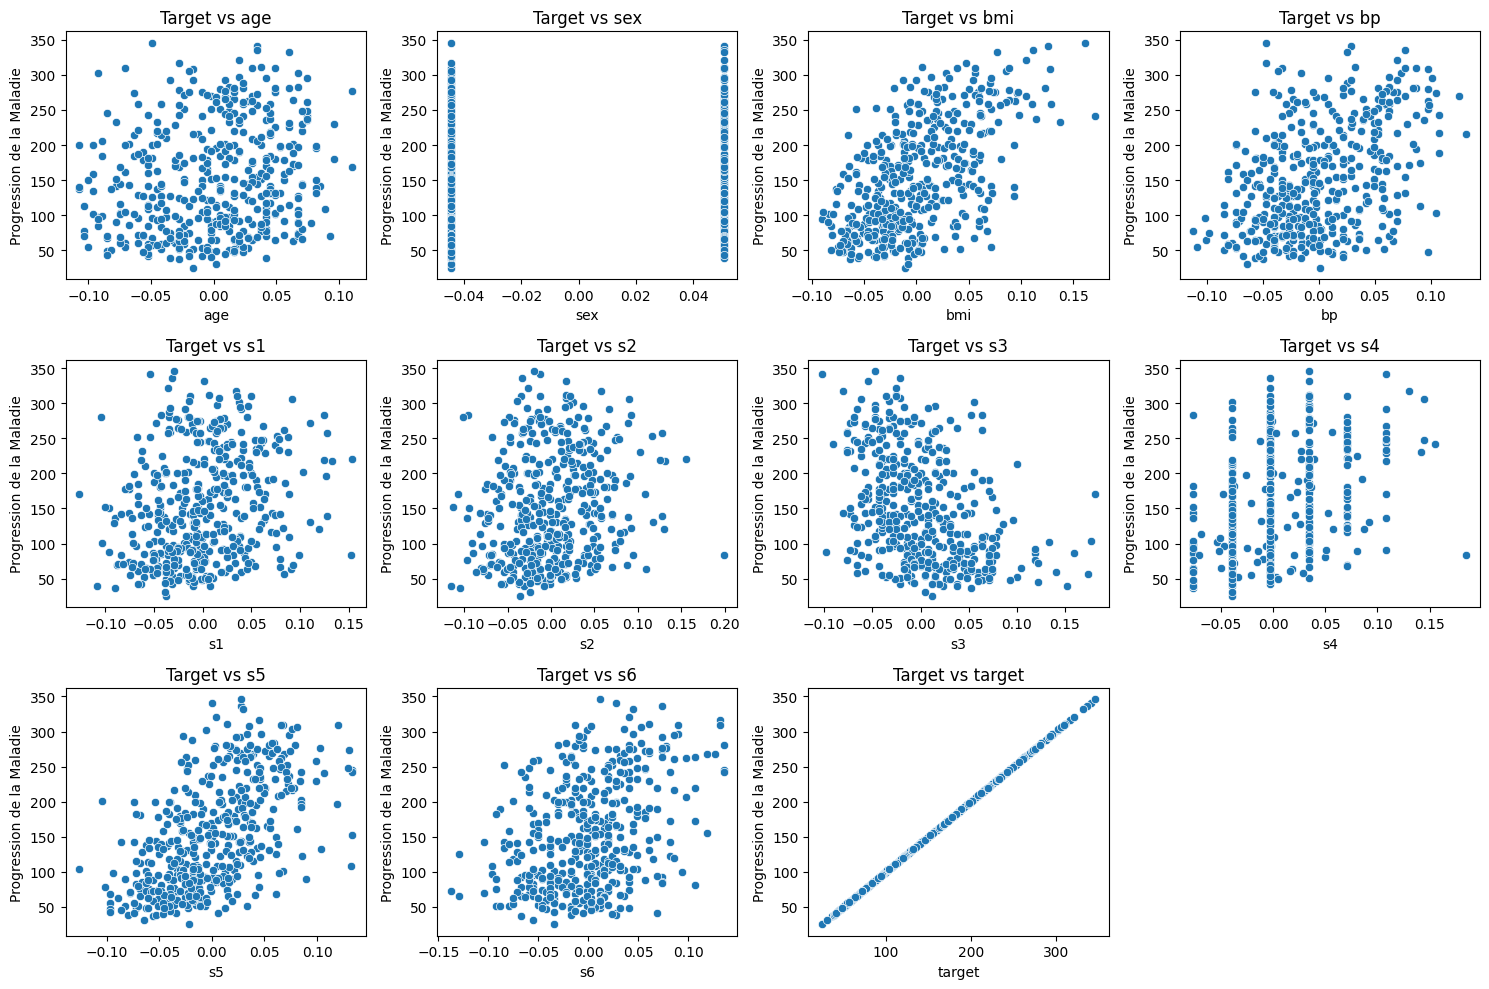

In [24]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=df[feature], y=df['target'])
    plt.title(f'Target vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Progression de la Maladie')
plt.tight_layout()
plt.show()

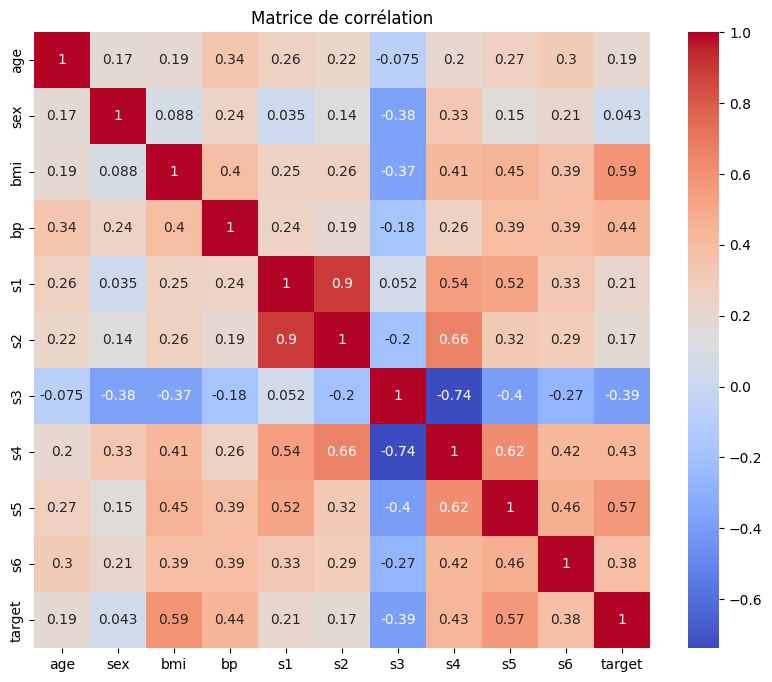

In [25]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, square = True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

possible correlation entre:
  * target et bmi --> 0.59
  * target et s5 --> 0.57
  * target et bp --> 0.44
  * target et s4 --> 0.43
  * target et s6 --> 0.38
  * s1 et s5
  * s1 et s4

# Feature engineering

In [34]:
X = df.drop('target', axis=1)
y = df['target']
X.head()
#y.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## Split des données en train et test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((353, 10), (89, 10), (353,), (89,))

# Les modèles de regressions choisis

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso

lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor()
lasso = Lasso(alpha = 0.1)

# Entrainement des modèles sur les données train

In [41]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

#Prediction sur le train et le test

In [42]:
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

gb_pred_train = gb.predict(X_train)
gb_pred_test = gb.predict(X_test)

lasso_pred_train = lasso.predict(X_train)
lasso_pred_test = lasso.predict(X_test)

# Evaluation des modèles

In [50]:
from sklearn.metrics import mean_squared_error, r2_score, rmse
mse = mean_squared_error(lr_pred_test, y_test)
r2 = r2_score(lr_pred_test, y_test)

rap = pd.DataFrame({'modèle':[lr], 'MSE':[mse], 'R2':[r2]})
rap
#rapport = sns.regression_report(y_test, y_pred)


,modèle,MSE,R2
0,LinearRegression(),2900.193628,0.006905


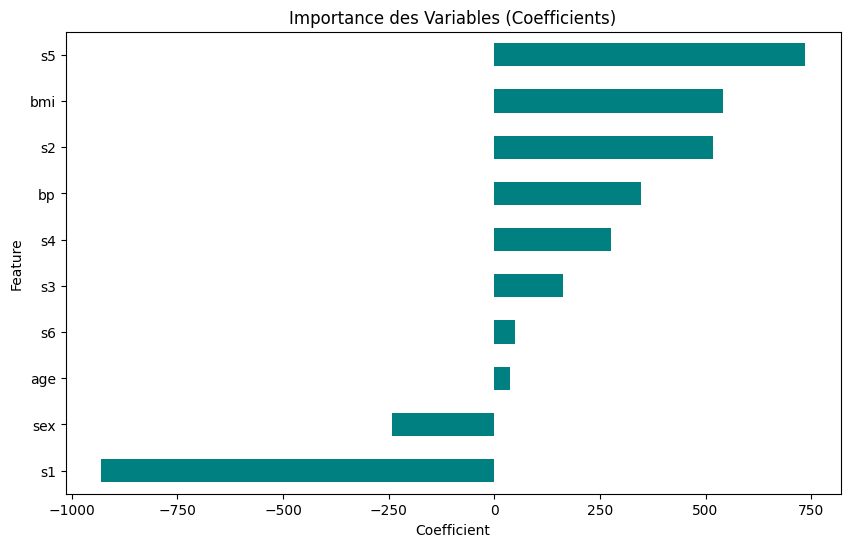

In [51]:
# Extraction des coefficients du modèle
coefficients = pd.Series(lr.coef_, index=X.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10, 6), color='teal')
plt.title('Importance des Variables (Coefficients)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

Modèles avec itération

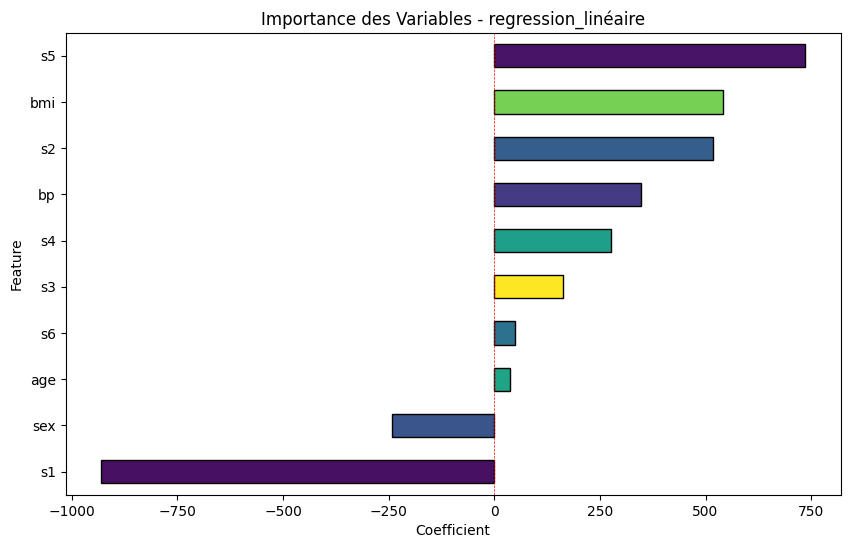

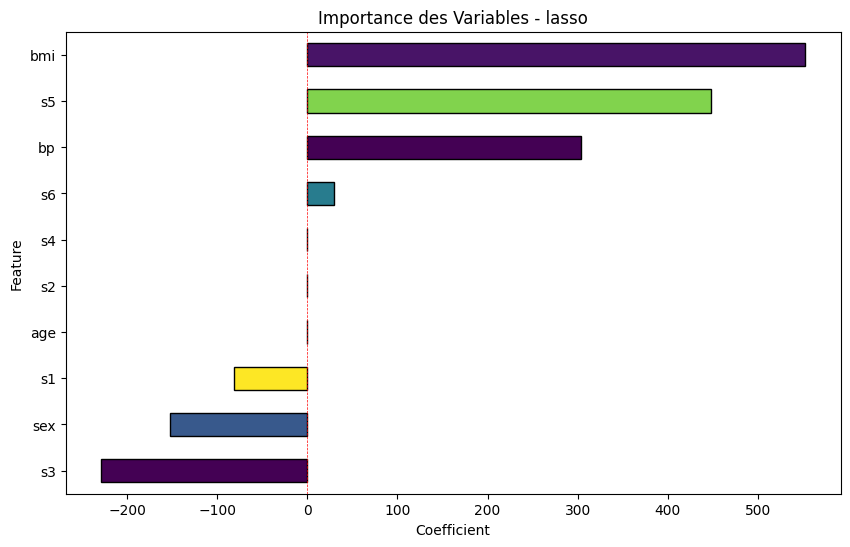

                modèle       RMSE        MAE        R2
0  regression_linéaire  53.853446  42.794095  0.452603
1        random_forest  54.332408  44.053034  0.442823
2    gradient_boosting  53.838918  44.524160  0.452898
3                lasso  52.897954  42.854428  0.471855

Meilleur Modèle : lasso avec RMSE = 52.8980


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score


# dictionnaire des modèles
models = {
    'regression_linéaire': LinearRegression(),
    'random_forest' : RandomForestRegressor(n_estimators=100, random_state=42),
    'gradient_boosting': GradientBoostingRegressor(),
    'lasso' : Lasso(alpha = 0.1)
}

# por stocker les résultats
results = []

# boucle pour itérer sur les modèles
for model_name, model in models.items():

  # entrainement des modèles
  model.fit(X_train, y_train)

  # prédiction
  y_pred = model.predict(X_test)

  # calcul des métrics accuracy, F-score, MAE
  rmse =  np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  #afficahage des résultats
  rapport = pd.DataFrame({'modèle':[model_name], 'RMSE': [rmse], 'MAE':[mae], 'R2':[r2]})

  results.append(rapport)

  # Extraction des coefficients du modèle
  if hasattr(model, 'coef_'):
    coefficients = pd.Series(model.coef_, index=X.columns)
    colors = coefficients.apply(lambda x: 'green' if x > 0 else 'red').tolist()
    magnitudes = np.abs(coefficients) / np.abs(coefficients).max()
    coefficients.sort_values().plot(kind='barh', figsize=(10, 6), color=plt.cm.viridis(magnitudes), edgecolor ='black')
    plt.title(f'Importance des Variables - {model_name}')
    plt.xlabel('Coefficient')
    plt.ylabel('Feature')
    plt.axvline(x=0, color='red', linestyle='--', linewidth = 0.5)
    plt.show()

#Combiner tous les résultats en un seul sataframe
all_results = pd.concat(results, ignore_index=True)
print(all_results)

# Trouver le modèle avec la meilleure accuracy
best_model = all_results.loc[all_results['RMSE'].idxmin()]
print(f"\nMeilleur Modèle : {best_model['modèle']} avec RMSE = {best_model['RMSE']:.4f}")

### Transformation de la target pour rendre la distribution plus mormale dans le but d'optimiser les performances.

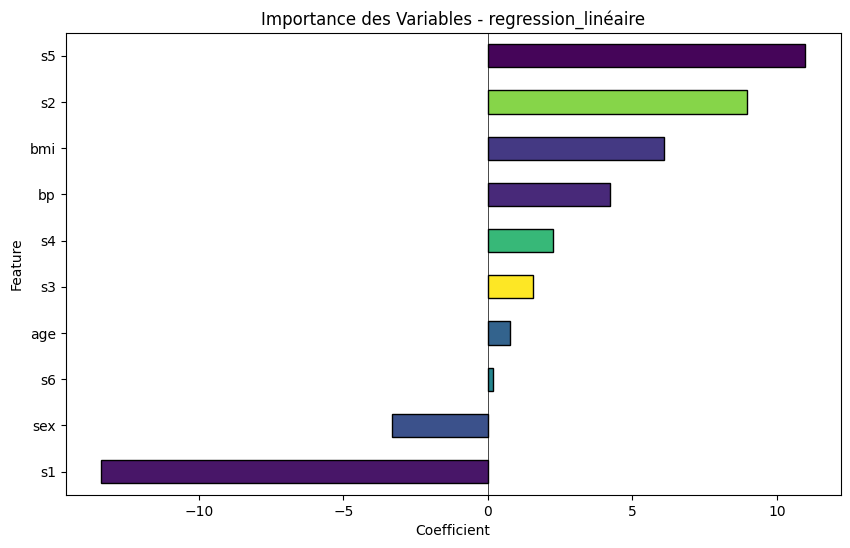

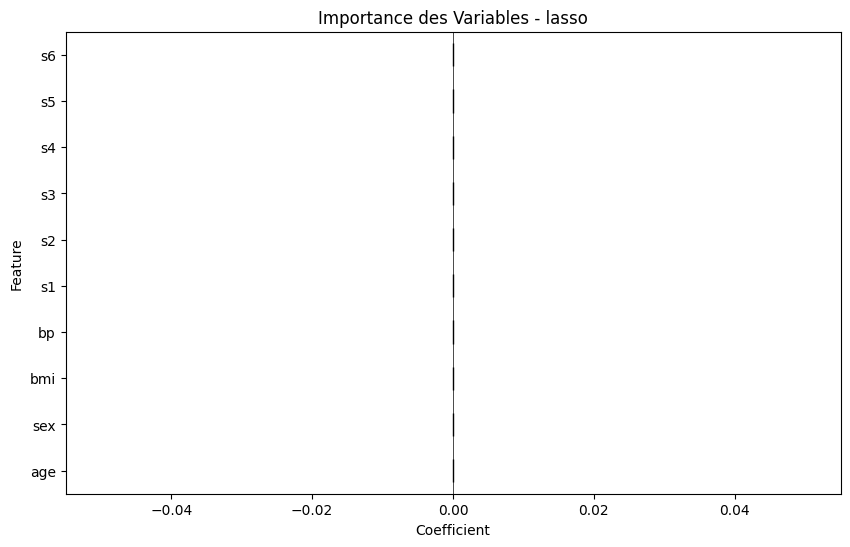

                Modèle       RMSE        MAE        R²
0  regression_linéaire  53.962995  42.150198  0.450373
1        random_forest  54.758243  43.786886  0.434054
2    gradient_boosting  52.660165  42.274778  0.476592
3                lasso  73.000077  62.561588 -0.005825

Meilleur Modèle : gradient_boosting avec RMSE = 52.6602


In [57]:
#
from sklearn.preprocessing import PowerTransformer  # Pour Box-Cox ou Yeo-Johnson

# Transformer la target pour réduire l'asymétrie (ici Yeo-Johnson, qui fonctionne aussi avec des valeurs négatives)
pt = PowerTransformer(method='yeo-johnson')
y_train_transformed = pt.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_transformed = pt.transform(y_test.values.reshape(-1, 1)).flatten()

# Réentraîner les modèles avec la target transformée
results = []

for model_name, model in models.items():
    # Entraînement avec la target transformée
    model.fit(X_train, y_train_transformed)

    # Prédiction sur l'ensemble de test
    y_pred_transformed = model.predict(X_test)

    # Re-transformer les prédictions pour les ramener à l'échelle originale
    y_pred = pt.inverse_transform(y_pred_transformed.reshape(-1, 1)).flatten()

    # Calcul des métriques
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Stocker les résultats dans un DataFrame
    rap = pd.DataFrame({
        'Modèle': [model_name],
        'RMSE': [rmse],
        'MAE': [mae],
        'R²': [r2]
    })
    results.append(rap)

    # Afficher les coefficients pour les modèles linéaires avec une échelle de couleur basée sur leur valeur
    if hasattr(model, 'coef_'):
        coefficients = pd.Series(model.coef_, index=X.columns)

        # Définir une échelle de couleur selon la magnitude des coefficients
        colors = coefficients.apply(lambda x: 'green' if x > 0 else 'red').tolist()
        magnitudes = np.abs(coefficients) / np.abs(coefficients).max()  # Normalisation pour intensité des couleurs

        plt.figure(figsize=(10, 6))
        coefficients.sort_values().plot(
            kind='barh',
            color=plt.cm.viridis(magnitudes),  # Utilisation d'une colormap pour indiquer l'importance
            edgecolor='black'
        )
        plt.title(f'Importance des Variables - {model_name}')
        plt.xlabel('Coefficient')
        plt.ylabel('Feature')
        plt.axvline(0, color='black', linewidth=0.5)
        plt.show()

# Combiner tous les résultats en un seul DataFrame
all_results = pd.concat(results, ignore_index=True)
print(all_results)

# Trouver le modèle avec le meilleur RMSE
best_model = all_results.loc[all_results['RMSE'].idxmin()]
print(f"\nMeilleur Modèle : {best_model['Modèle']} avec RMSE = {best_model['RMSE']:.4f}")


# GridSearch

In [60]:
from sklearn.model_selection import GridSearchCV

# Exemple avec le modèle Lasso
lasso = Lasso()
parameters = {
    'alpha': [0.01, 0.1, 1, 10],  # Choix de plusieurs valeurs pour alpha
}

# GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Meilleurs hyperparamètres:", best_params)

# Prédiction et calcul des métriques avec le meilleur modèle
y_pred = best_model.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")


Meilleurs hyperparamètres: {'alpha': 0.1}
RMSE: 52.89795350644219


In [62]:
# Déclaration des modèles et des grilles de paramètres
models = {
    'regression_linéaire': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            #'normalize': [True, False]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10],
            'max_iter': [1000, 2000, 3000]
        }
    }
}

# Pour stocker les meilleurs modèles et les résultats
results = []
best_models = {}

# Boucle sur chaque modèle et exécution du GridSearchCV
for model_name, config in models.items():
    print(f"Optimisation du modèle: {model_name}")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring='neg_mean_squared_error',  # On utilise MSE négatif car GridSearch maximise le score
        cv=5,  # Validation croisée à 5 plis
        n_jobs=-1  # Utiliser tous les cœurs disponibles pour accélérer
    )

    # Entraînement du GridSearch
    grid_search.fit(X_train, y_train)

    # Récupération des meilleurs paramètres et du meilleur modèle
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Prédiction avec le meilleur modèle
    y_pred = best_model.predict(X_test)

    # Calcul des métriques de performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Sauvegarde des résultats
    results.append({
        'modèle': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Meilleurs paramètres': best_params
    })

# Affichage des résultats
results_df = pd.DataFrame(results)
print(results_df)

# Afficher le meilleur modèle global basé sur RMSE (ou une autre métrique)
best_model_name = results_df.loc[results_df['RMSE'].idxmin()]['modèle']
print(f"\nMeilleur Modèle : {best_model_name} avec RMSE = {results_df['RMSE'].min():.4f}")
print(f"Meilleurs paramètres du modèle {best_model_name}: {best_models[best_model_name]}")

Optimisation du modèle: regression_linéaire
Optimisation du modèle: random_forest
Optimisation du modèle: gradient_boosting
Optimisation du modèle: lasso
                modèle       RMSE        MAE        R2  \
0  regression_linéaire  53.853446  42.794095  0.452603   
1        random_forest  54.164550  43.957647  0.446260   
2    gradient_boosting  53.589663  44.634727  0.457952   
3                lasso  52.897954  42.854428  0.471855   

                                Meilleurs paramètres  
0                            {'fit_intercept': True}  
1  {'max_depth': 10, 'min_samples_split': 10, 'n_...  
2  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
3                   {'alpha': 0.1, 'max_iter': 1000}  

Meilleur Modèle : lasso avec RMSE = 52.8980
Meilleurs paramètres du modèle lasso: Lasso(alpha=0.1)


# Test avec les features corrélés à la target

In [71]:
X_train.head()
X_test.head()

X_corr_features_train = X_train.drop(['sex','s1', 's6'], axis=1)

X_corr_features_test = X_test.drop(['sex','s1', 's6'], axis=1)

print(X_corr_features_train.head())
print(X_corr_features_test.head())

          age       bmi        bp        s2        s3        s4        s5
17   0.070769  0.012117  0.056301  0.049416 -0.039719  0.034309  0.027364
66  -0.009147 -0.018062 -0.033213  0.012152 -0.072854  0.071210  0.000272
137  0.005383  0.049840  0.097615 -0.016345 -0.006584 -0.002592  0.017036
245 -0.027310 -0.035307 -0.029770 -0.058620  0.030232 -0.039493 -0.049872
31  -0.023677 -0.065486 -0.081413 -0.053610  0.059685 -0.076395 -0.037129
          age       bmi        bp        s2        s3        s4        s5
287  0.045341 -0.006206 -0.015999  0.125198  0.019187  0.034309  0.032432
211  0.092564  0.036907  0.021872 -0.016658  0.000779 -0.039493 -0.022517
72   0.063504 -0.004050 -0.012556  0.048790  0.056003 -0.002592  0.084492
321  0.096197  0.051996  0.079265  0.036577 -0.076536  0.141322  0.098648
73   0.012648 -0.020218 -0.002228  0.053174 -0.006584  0.034309 -0.005142


In [72]:
# Déclaration des modèles et des grilles de paramètres
models = {
    'regression_linéaire': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            #'normalize': [True, False]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10],
            'max_iter': [1000, 2000, 3000]
        }
    }
}

# Pour stocker les meilleurs modèles et les résultats
results = []
best_models = {}

# Boucle sur chaque modèle et exécution du GridSearchCV
for model_name, config in models.items():
    print(f"Optimisation du modèle: {model_name}")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring='neg_mean_squared_error',  # On utilise MSE négatif car GridSearch maximise le score
        cv=5,  # Validation croisée à 5 plis
        n_jobs=-1  # Utiliser tous les cœurs disponibles pour accélérer
    )

    # Entraînement du GridSearch
    grid_search.fit(X_corr_features_train, y_train)

    # Récupération des meilleurs paramètres et du meilleur modèle
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    # Prédiction avec le meilleur modèle
    y_pred = best_model.predict(X_corr_features_test)

    # Calcul des métriques de performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Sauvegarde des résultats
    results.append({
        'modèle': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Meilleurs paramètres': best_params
    })

# Affichage des résultats
results_df = pd.DataFrame(results)
print(results_df)

# Afficher le meilleur modèle global basé sur RMSE (ou une autre métrique)
best_model_name = results_df.loc[results_df['RMSE'].idxmin()]['modèle']
print(f"\nMeilleur Modèle : {best_model_name} avec RMSE = {results_df['RMSE'].min():.4f}")
print(f"Meilleurs paramètres du modèle {best_model_name}: {best_models[best_model_name]}")

Optimisation du modèle: regression_linéaire
Optimisation du modèle: random_forest
Optimisation du modèle: gradient_boosting
Optimisation du modèle: lasso
                modèle       RMSE        MAE        R2  \
0  regression_linéaire  54.404916  43.999115  0.441334   
1        random_forest  54.900746  44.046958  0.431105   
2    gradient_boosting  53.435054  43.593435  0.461075   
3                lasso  53.777936  43.773549  0.454137   

                                Meilleurs paramètres  
0                            {'fit_intercept': True}  
1  {'max_depth': 10, 'min_samples_split': 10, 'n_...  
2  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
3                   {'alpha': 0.1, 'max_iter': 1000}  

Meilleur Modèle : gradient_boosting avec RMSE = 53.4351
Meilleurs paramètres du modèle gradient_boosting: GradientBoostingRegressor(learning_rate=0.01, n_estimators=200, random_state=42)
